### Deliverable 3: Optimize the Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

2023-02-01 10:47:23.423478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Determine the number of unique values in each column
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [3]:
# Look at STATUS value counts
application_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [4]:
application_df[application_df.STATUS == 0].head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
2816,205559542,INTERNATIONAL FEDERATION OF FLY FISHERS INC,T3,CompanySponsored,C2000,CommunityServ,Trust,0,0,N,5000,1
2928,205918776,THE STEWART FOUNDATION INC,T3,Independent,C1000,Preservation,Trust,0,25000-99999,Y,7287,1
10155,330970564,META POINT INC,T3,Independent,C1000,Preservation,Trust,0,10000-24999,N,5000,1
20518,510594485,MOMS CLUB,T3,CompanySponsored,C2100,CommunityServ,Association,0,0,N,5000,0
29590,841164329,SKYVIEW VILLAGE INC SENIOR HOUSING,T3,Independent,C1000,Preservation,Association,0,0,N,5000,0


In [5]:
# Look at SPECIAL_CONSIDERATIONS value counts
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [6]:
application_df[application_df.SPECIAL_CONSIDERATIONS == 'Y'].head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
1374,201444113,PTA TEXAS CONGRESS,T3,Independent,C2000,Preservation,Association,1,0,Y,5000,0
2928,205918776,THE STEWART FOUNDATION INC,T3,Independent,C1000,Preservation,Trust,0,25000-99999,Y,7287,1
6056,263885231,MT OLIVE OUTREACH CENTER OF STOCKBRIDGE INC,T3,Independent,C1700,Preservation,Trust,1,0,Y,5000,1
6805,270626168,SUPPORTING OTHERS ACHIEVE RECOVERY INC,T3,Independent,C1000,Preservation,Trust,1,25000-99999,Y,5000,1
7747,272700404,MERRITT ISLAND LACROSSE CLUB INC,T3,Independent,C1000,Preservation,Trust,1,0,Y,5000,0


In [7]:
# Drop the non-beneficial ID columns, 'EIN,' 'NAME,', 'STATUS,' and 'SPECIAL_CONSIDERATIONS'
application_df = application_df.drop(columns = ["EIN", "NAME", "STATUS", "SPECIAL_CONSIDERATIONS"], axis = 1)

In [8]:
# Look at APPLICATION_TYPE value counts for binning
type_counts = application_df.APPLICATION_TYPE.value_counts()
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

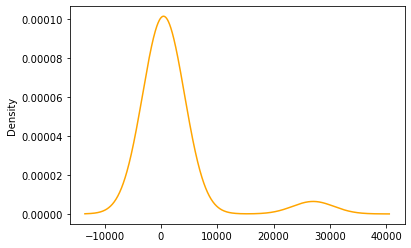

In [9]:
# Visualize the value counts of APPLICATION_TYPE
type_counts.plot.density(color = 'orange')

In [10]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_counts[type_counts < 700].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

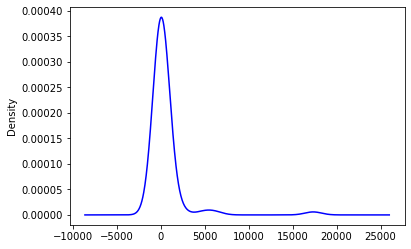

In [12]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density(color = 'blue')

In [13]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls, "Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index = True, right_index = True)
application_df = application_df.drop(application_cat, axis = 1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop("IS_SUCCESSFUL", axis = 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural network, i.e., the number of input features and hidden nodes for each layer
input_features = len(X_train[0])
nodes_layer1 = 80
nodes_layer2 = 30
nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = nodes_layer1, input_dim = input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = nodes_layer2, activation = "relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units = nodes_layer3, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3200      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      


2023-02-01 10:47:34.276233: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [21]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames.
os.makedirs("checkpoints/", exist_ok = True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [22]:
# Create a callback every five epochs
callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only = True,
    save_freq = 'epoch')

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 50, callbacks = [callback])

Epoch 1/50
785/804 [============================>.] - ETA: 0s - loss: 0.5730 - accuracy: 0.7192
Epoch 1: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 3s 2ms/step - loss: 0.5723 - accuracy: 0.7197
Epoch 2/50
794/804 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7268
Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5547 - accuracy: 0.7273
Epoch 3/50
789/804 [============================>.] - ETA: 0s - loss: 0.5511 - accuracy: 0.7309
Epoch 3: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5520 - accuracy: 0.7302
Epoch 4/50
797/804 [============================>.] - ETA: 0s - loss: 0.5503 - accuracy: 0.7317
Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7317
Epoch 5/50
801/804 [============================

787/804 [============================>.] - ETA: 0s - loss: 0.5402 - accuracy: 0.7381
Epoch 35: saving model to checkpoints/weights.35.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5397 - accuracy: 0.7379
Epoch 36/50
801/804 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7376
Epoch 36: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5399 - accuracy: 0.7378
Epoch 37/50
786/804 [============================>.] - ETA: 0s - loss: 0.5396 - accuracy: 0.7385
Epoch 37: saving model to checkpoints/weights.37.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5399 - accuracy: 0.7385
Epoch 38/50
782/804 [============================>.] - ETA: 0s - loss: 0.5398 - accuracy: 0.7371
Epoch 38: saving model to checkpoints/weights.38.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5395 - accuracy: 0.7377
Epoch 39/50
778/804 [============================>.]

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5539 - accuracy: 0.7300 - 622ms/epoch - 2ms/step
Loss: 0.553910493850708, Accuracy: 0.7300291657447815


In [25]:
# Export the model to a HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")